In [31]:
import os
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import random as rd
from tqdm import tqdm

In [2]:
#upload the doodle dataset zip file on your drive to use
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
torch.cuda.empty_cache()

In [5]:
!unrar e '/content/drive/MyDrive/doodle/Doodle dataset.rar' #unrar the doodle dataset from your drive


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/doodle/Doodle dataset.rar

Extracting  full_numpy_bitmap_airplane.npy                                 0%  1%  2%  3%  4%  5%  OK 
Extracting  full_numpy_bitmap_ant.npy                                      5%  6%  7%  8%  9%  OK 
Extracting  full_numpy_bitmap_banana.npy                                   9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19%  OK 
Extracting  full_numpy_bitmap_baseball.npy                                19% 20% 21% 22% 23% 24% 25%  OK 
Extracting  full_numpy_bitmap_bird.npy                                    25% 26% 27% 28% 29% 30%  OK 
Extracting  full_numpy_bitmap_bucket.npy                                  30% 31% 32% 33% 34%  OK 
Extracting  full_numpy_bitmap_butterfly.n

In [6]:
classes = ["airplane", "ant", "banana", "baseball", "bird", "bucket", "butterfly", "cat", "coffee cup",
           "dolphin", "donut", "duck", "fish", "leaf", "mountain", "pencil", "smiley face", "snake", "umbrella", "wine bottle"]
print(len(classes))

20


In [7]:
Ap = torch.from_numpy(np.load("/content/full_numpy_bitmap_airplane.npy"))
print(Ap.shape)
l1=np.full((151623,1),0)
ant = torch.from_numpy(np.load("/content/full_numpy_bitmap_ant.npy"))
l2=np.full((124612,1),1)
print(ant.shape)
bn = torch.from_numpy(np.load("/content/full_numpy_bitmap_banana.npy"))
print(bn.shape)
l3=np.full((307936,1),2)
bb = torch.from_numpy(np.load("/content/full_numpy_bitmap_baseball.npy"))
print(bb.shape)
l4=np.full((135375,1),3)
bird = torch.from_numpy(np.load("/content/full_numpy_bitmap_bird.npy"))
print(bird.shape)
l5=np.full((133572,1),4)
bk = torch.from_numpy(np.load("/content/full_numpy_bitmap_bucket.npy"))
print(bk.shape)
l6=np.full((124064,1),5)
bfly = torch.from_numpy(np.load("/content/full_numpy_bitmap_butterfly.npy"))
print(bfly.shape)
l7=np.full((117999,1),6)
cat = torch.from_numpy(np.load("/content/full_numpy_bitmap_cat.npy"))
print(cat.shape)
l8=np.full((123202,1),7)
cc = torch.from_numpy(np.load("/content/full_numpy_bitmap_coffee cup.npy"))
print(cc.shape)
l9=np.full((183432,1),8)
dolp = torch.from_numpy(np.load("/content/full_numpy_bitmap_dolphin.npy"))
print(dolp.shape)
l10=np.full((121613,1),9)
dn = torch.from_numpy(np.load("/content/full_numpy_bitmap_donut.npy"))
print(dn.shape)
l11=np.full((140751,1),10)
dk = torch.from_numpy(np.load("/content/full_numpy_bitmap_duck.npy"))
print(dk.shape)
l12=np.full((135480,1),11)
fish = torch.from_numpy(np.load("/content/full_numpy_bitmap_fish.npy"))
print(fish.shape)
l13=np.full((134150,1),12)
lf = torch.from_numpy(np.load("/content/full_numpy_bitmap_leaf.npy"))
print(lf.shape)
l14=np.full((125571,1),13)
mt = torch.from_numpy(np.load("/content/full_numpy_bitmap_mountain.npy"))
print(mt.shape)
l15=np.full((128540,1),14)
pn = torch.from_numpy(np.load("/content/full_numpy_bitmap_pencil.npy"))
print(pn.shape)
l16=np.full((122001,1),15)
sf = torch.from_numpy(np.load("/content/full_numpy_bitmap_smiley face.npy"))
print(sf.shape)
l17=np.full((124386,1),16)
snk = torch.from_numpy(np.load("/content/full_numpy_bitmap_snake.npy"))
print(snk.shape)
l18=np.full((122273,1),17)
umb = torch.from_numpy(np.load("/content/full_numpy_bitmap_umbrella.npy"))
print(umb.shape)
l19=np.full((124084,1),18)
wb = torch.from_numpy(np.load("/content/full_numpy_bitmap_wine bottle.npy"))
print(wb.shape)
l20=np.full((126373,1),19)

torch.Size([151623, 784])
torch.Size([124612, 784])
torch.Size([307936, 784])
torch.Size([135375, 784])
torch.Size([133572, 784])
torch.Size([124064, 784])
torch.Size([117999, 784])
torch.Size([123202, 784])
torch.Size([183432, 784])
torch.Size([121613, 784])
torch.Size([140751, 784])
torch.Size([135480, 784])
torch.Size([134150, 784])
torch.Size([125571, 784])
torch.Size([128540, 784])
torch.Size([122001, 784])
torch.Size([124386, 784])
torch.Size([122273, 784])
torch.Size([124084, 784])
torch.Size([126373, 784])


In [8]:
dataset = torch.cat((Ap,ant,bn,bb,bird,bk,bfly,cat,cc,dolp,dn,dk,fish,lf,mt,pn,sf,snk,umb,wb),0)
print(dataset.size())

torch.Size([2807037, 784])


In [9]:
labels_set = np.concatenate((l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14,l15,l16,l17,l18,l19,l20))
# print(np.sum(labels_set))
labels_set = torch.from_numpy(labels_set)
print(labels_set.size())

torch.Size([2807037, 1])


In [10]:
train_set, test_set, lbl_train,lbl_test = train_test_split(dataset,labels_set, test_size=0.33, random_state=1)
print(train_set.shape)
print(test_set.shape)
print(lbl_train.shape)
print(lbl_test.shape)

torch.Size([1880714, 784])
torch.Size([926323, 784])
torch.Size([1880714, 1])
torch.Size([926323, 1])


Looks like: umbrella


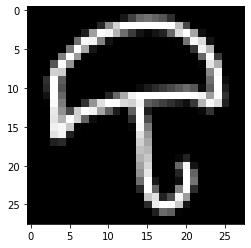

In [11]:
n = rd.randrange(0,1880713)
image,label = train_set[n], lbl_train[n]
# print(image.shape)
plt.imshow(image.reshape(28,28) , cmap='gray', interpolation = "nearest")
print("Looks like: "+classes[label])

In [12]:
class Data_Set(Dataset):
    def __init__(self,t_set,lbl_set):
        self.x = t_set.reshape(t_set.shape[0],1,28,28)
        self.y = lbl_set
        self.l = t_set.shape[0]
    def __getitem__(self,i):
        return self.x[i],self.y[i]
    def __len__(self):
        return self.l

In [13]:
data_train = Data_Set(train_set,lbl_train)
dataloader_train = DataLoader(data_train, batch_size=512, shuffle=False, num_workers=2)
data_test = Data_Set(test_set,lbl_test)
dataloader_test = DataLoader(data_test, batch_size=512, shuffle=False, num_workers=2)

In [14]:
class ConvNetwork(nn.Module):
    def __init__(self):
        super(ConvNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 8, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(8, 20, 5)

        self.fc1 = nn.Linear(20 * 4 * 4, 200)
        self.fc2 = nn.Linear(200, 120)
        self.fc3 = nn.Linear(120, 84)
        self.fc4 = nn.Linear(84, 20)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [15]:
def prediction(out,y):
    _, predict = torch.max(out,1)
    return (predict==y).sum().item()

In [32]:
def training(train_loader,model, loss,opt, print_cost):

    train_correct=0
    train_size = len(train_loader.dataset)
    n_samples = 0
    running_loss=0.0
    for i, (imgs,labels) in enumerate(tqdm(train_loader)):

        batch_size = train_loader.batch_size
        imgs = imgs.to(device)
        labels = labels.to(device)
        labels = labels.squeeze(1) 

        #forward pass
        out = model(imgs.float())
        cost = loss(out,labels)
        running_loss+= cost.item()
        #backward pass
        opt.zero_grad()
        cost.backward()
        opt.step()

        # prediction
        n_samples += labels.shape[0]
        train_correct += prediction(out,labels)
        
        if (i+1)%100==0 and print_cost:
            print(f"Cost  [{i+1}/{len(train_loader)}] : {cost.item()}")

    acc= 100*train_correct/n_samples
    print("Train Accuracy: ",acc," %")
    return running_loss/len(train_loader)

In [33]:
def testing(test_loader,model,loss,opt):

    test_loss, test_correct = 0, 0
    num_batches = len(test_loader)
    batch_size = test_loader.batch_size

    n_samples = 0
    i=0
    with torch.no_grad():
        for imgs, labels in tqdm(test_loader):

            imgs = imgs.to(device)
            labels = labels.to(device)
            labels = labels.squeeze(1)

            # forward pass
            out = model(imgs.float())

            n_samples += labels.shape[0]
            test_loss += loss(out, labels).item()
            # prediction
            test_correct += prediction(out,labels)

            i+=1

    test_loss /= num_batches
    acc = 100*test_correct/n_samples
    print("Test Accuracy: ",acc," %")
    return test_loss

In [34]:
cnn_model = ConvNetwork().to(device)
params = cnn_model.parameters()
alpha = 0.001
train_loss = []
test_loss=[]

In [35]:
loss = nn.CrossEntropyLoss()
opt = torch.optim.Adam(params, lr=alpha, betas=(0.9, 0.999), eps=1e-08)

In [36]:
num_epochs=25
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}")
    train_epoch_loss = training(dataloader_train, cnn_model, loss, opt, print_cost=False)
    train_loss.append(train_epoch_loss)
    test_epoch_loss = testing(dataloader_test, cnn_model, loss, opt)  
    test_loss.append(test_epoch_loss)      
    print("---")


Epoch 1


100%|██████████| 3674/3674 [00:26<00:00, 141.27it/s]


Train Accuracy:  84.94486668361058  %


100%|██████████| 1810/1810 [00:10<00:00, 175.31it/s]


Test Accuracy:  88.12228563902656  %
---
Epoch 2


100%|██████████| 3674/3674 [00:25<00:00, 143.61it/s]


Train Accuracy:  88.91814491730268  %


100%|██████████| 1810/1810 [00:10<00:00, 177.36it/s]


Test Accuracy:  89.18832847721583  %
---
Epoch 3


100%|██████████| 3674/3674 [00:25<00:00, 145.59it/s]


Train Accuracy:  89.66264939804776  %


100%|██████████| 1810/1810 [00:10<00:00, 173.56it/s]


Test Accuracy:  89.77624435537064  %
---
Epoch 4


100%|██████████| 3674/3674 [00:25<00:00, 143.26it/s]


Train Accuracy:  90.08243677667099  %


100%|██████████| 1810/1810 [00:10<00:00, 174.36it/s]


Test Accuracy:  89.7385685122792  %
---
Epoch 5


100%|██████████| 3674/3674 [00:24<00:00, 147.11it/s]


Train Accuracy:  90.34802739810519  %


100%|██████████| 1810/1810 [00:10<00:00, 177.53it/s]


Test Accuracy:  89.88592531978587  %
---
Epoch 6


100%|██████████| 3674/3674 [00:24<00:00, 149.31it/s]


Train Accuracy:  90.524024386483  %


100%|██████████| 1810/1810 [00:10<00:00, 176.61it/s]


Test Accuracy:  89.93428857968549  %
---
Epoch 7


100%|██████████| 3674/3674 [00:24<00:00, 149.87it/s]


Train Accuracy:  90.66232292629289  %


100%|██████████| 1810/1810 [00:10<00:00, 180.91it/s]


Test Accuracy:  89.97714620062332  %
---
Epoch 8


100%|██████████| 3674/3674 [00:25<00:00, 146.54it/s]


Train Accuracy:  90.77100505446336  %


100%|██████████| 1810/1810 [00:10<00:00, 177.18it/s]


Test Accuracy:  90.05983873875527  %
---
Epoch 9


100%|██████████| 3674/3674 [00:25<00:00, 144.95it/s]


Train Accuracy:  90.89032144175032  %


100%|██████████| 1810/1810 [00:10<00:00, 175.28it/s]


Test Accuracy:  90.00467439543226  %
---
Epoch 10


100%|██████████| 3674/3674 [00:25<00:00, 143.83it/s]


Train Accuracy:  90.97071644067094  %


100%|██████████| 1810/1810 [00:10<00:00, 176.95it/s]


Test Accuracy:  90.01449818259937  %
---
Epoch 11


100%|██████████| 3674/3674 [00:24<00:00, 147.86it/s]


Train Accuracy:  91.0424976897072  %


100%|██████████| 1810/1810 [00:10<00:00, 175.21it/s]


Test Accuracy:  89.95739067258397  %
---
Epoch 12


100%|██████████| 3674/3674 [00:24<00:00, 149.34it/s]


Train Accuracy:  91.12225463308084  %


100%|██████████| 1810/1810 [00:10<00:00, 177.06it/s]


Test Accuracy:  90.10269635969311  %
---
Epoch 13


100%|██████████| 3674/3674 [00:25<00:00, 143.73it/s]


Train Accuracy:  91.15559303541102  %


100%|██████████| 1810/1810 [00:10<00:00, 178.25it/s]


Test Accuracy:  89.91431714423587  %
---
Epoch 14


100%|██████████| 3674/3674 [00:25<00:00, 146.72it/s]


Train Accuracy:  91.2025432894103  %


100%|██████████| 1810/1810 [00:10<00:00, 176.09it/s]


Test Accuracy:  90.20730349996707  %
---
Epoch 15


100%|██████████| 3674/3674 [00:25<00:00, 146.87it/s]


Train Accuracy:  91.28160900594136  %


100%|██████████| 1810/1810 [00:10<00:00, 171.76it/s]


Test Accuracy:  90.24336003748152  %
---
Epoch 16


100%|██████████| 3674/3674 [00:24<00:00, 147.74it/s]


Train Accuracy:  91.28947835768756  %


100%|██████████| 1810/1810 [00:10<00:00, 178.79it/s]


Test Accuracy:  90.14523011951555  %
---
Epoch 17


100%|██████████| 3674/3674 [00:24<00:00, 148.67it/s]


Train Accuracy:  91.33377004690772  %


100%|██████████| 1810/1810 [00:10<00:00, 176.75it/s]


Test Accuracy:  90.25145656536651  %
---
Epoch 18


100%|██████████| 3674/3674 [00:24<00:00, 148.45it/s]


Train Accuracy:  91.34887069485312  %


100%|██████████| 1810/1810 [00:10<00:00, 169.33it/s]


Test Accuracy:  90.28233132503458  %
---
Epoch 19


100%|██████████| 3674/3674 [00:24<00:00, 147.06it/s]


Train Accuracy:  91.37146849547565  %


100%|██████████| 1810/1810 [00:10<00:00, 177.64it/s]


Test Accuracy:  90.31417766804883  %
---
Epoch 20


100%|██████████| 3674/3674 [00:25<00:00, 143.96it/s]


Train Accuracy:  91.38784525451504  %


100%|██████████| 1810/1810 [00:10<00:00, 173.79it/s]


Test Accuracy:  90.35563189081994  %
---
Epoch 21


100%|██████████| 3674/3674 [00:25<00:00, 143.83it/s]


Train Accuracy:  91.41980120316008  %


100%|██████████| 1810/1810 [00:10<00:00, 172.98it/s]


Test Accuracy:  90.3156890199207  %
---
Epoch 22


100%|██████████| 3674/3674 [00:24<00:00, 148.20it/s]


Train Accuracy:  91.44234583248702  %


100%|██████████| 1810/1810 [00:09<00:00, 182.19it/s]


Test Accuracy:  90.30834816797164  %
---
Epoch 23


100%|██████████| 3674/3674 [00:25<00:00, 145.39it/s]


Train Accuracy:  91.46978222100755  %


100%|██████████| 1810/1810 [00:09<00:00, 181.59it/s]


Test Accuracy:  90.37938170594921  %
---
Epoch 24


100%|██████████| 3674/3674 [00:25<00:00, 146.02it/s]


Train Accuracy:  91.4862653226381  %


100%|██████████| 1810/1810 [00:10<00:00, 177.22it/s]


Test Accuracy:  90.21669547231366  %
---
Epoch 25


100%|██████████| 3674/3674 [00:24<00:00, 148.21it/s]


Train Accuracy:  91.53162043776992  %


100%|██████████| 1810/1810 [00:10<00:00, 171.60it/s]

Test Accuracy:  90.3552000759994  %
---


In [49]:
def plot_cost(train_loss, title):
    plt.plot(train_loss, color='blue', label='Train loss')
    plt.ylabel('loss')
    plt.xlabel('epochs ')
    plt.title(title)
    plt.legend()
    plt.show()

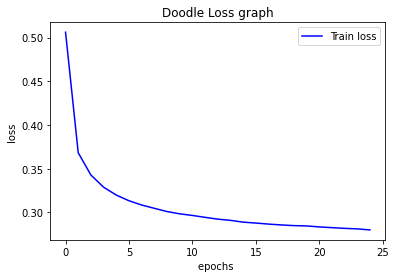

In [40]:
plot_cost(train_loss, "Doodle Loss graph")

In [41]:
from google.colab import files
import helper

In [43]:
# save the model
FILE = 'doodle_model.pth'
torch.save(cnn_model.state_dict(), FILE)
files.download('doodle_model.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
loaded_model = ConvNetwork()
loaded_model.load_state_dict(torch.load(FILE))
loaded_model.eval()

ConvNetwork(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=20, bias=True)
)

Looks like :  fish


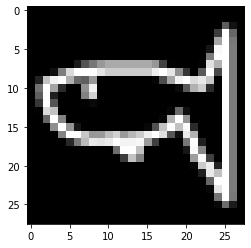

In [50]:
# test your model's accuracy with predicted results
sample = next(iter(dataloader_test))
images, labels = sample

n = rd.randrange(0,len(images))
img = images[n]

plt.imshow(img.reshape(28,28),cmap = 'gray')
img = img.to(device)
img = img.reshape(1,1,28,28)
out = cnn_model(img.float())
_, predicted = torch.max(out, 1)
print("Looks like : ",classes[predicted])